In [1]:
import os
import pandas as pd
import scipy
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\liujess\\Documents\\Code Library\\Python'

In [4]:
df =pd.read_csv('C:\\Users\\liujess\\Documents\\Telco\\Vertical\\3-B2B\\business_user_sign_up.csv')

In [5]:
df.head()

,creation date,vertical,business_users,ind_users
0,11/1/2018,Government,7301,11011
1,12/1/2016,Unclassified,6847,7208
2,8/1/2019,Unclassified,33245,38137
3,12/1/2016,Government,4409,5869
4,3/1/2019,Healthcare,11197,14519


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 4 columns):
creation date     282 non-null object
vertical          282 non-null object
business_users    282 non-null int64
ind_users         282 non-null int64
dtypes: int64(2), object(2)
memory usage: 8.9+ KB


In [41]:
df['creation date']=pd.to_datetime(df['creation date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 4 columns):
creation date     282 non-null datetime64[ns]
vertical          282 non-null object
business_users    282 non-null int64
ind_users         282 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 8.9+ KB


In [42]:
df.head()

,creation date,vertical,business_users,ind_users
0,2018-11-01,Government,7301,11011
1,2016-12-01,Unclassified,6847,7208
2,2019-08-01,Unclassified,33245,38137
3,2016-12-01,Government,4409,5869
4,2019-03-01,Healthcare,11197,14519


In [43]:
bus_sign_up = df[['creation date', 'business_users']]
bus_sign_up.set_index('creation date', inplace=True)

In [45]:
bus_sign_up.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 282 entries, 2018-11-01 to 2018-01-01
Data columns (total 1 columns):
business_users    282 non-null int64
dtypes: int64(1)
memory usage: 4.4 KB


In [50]:
bus_sign_up.sorted()

AttributeError: 'DataFrame' object has no attribute 'sorted'

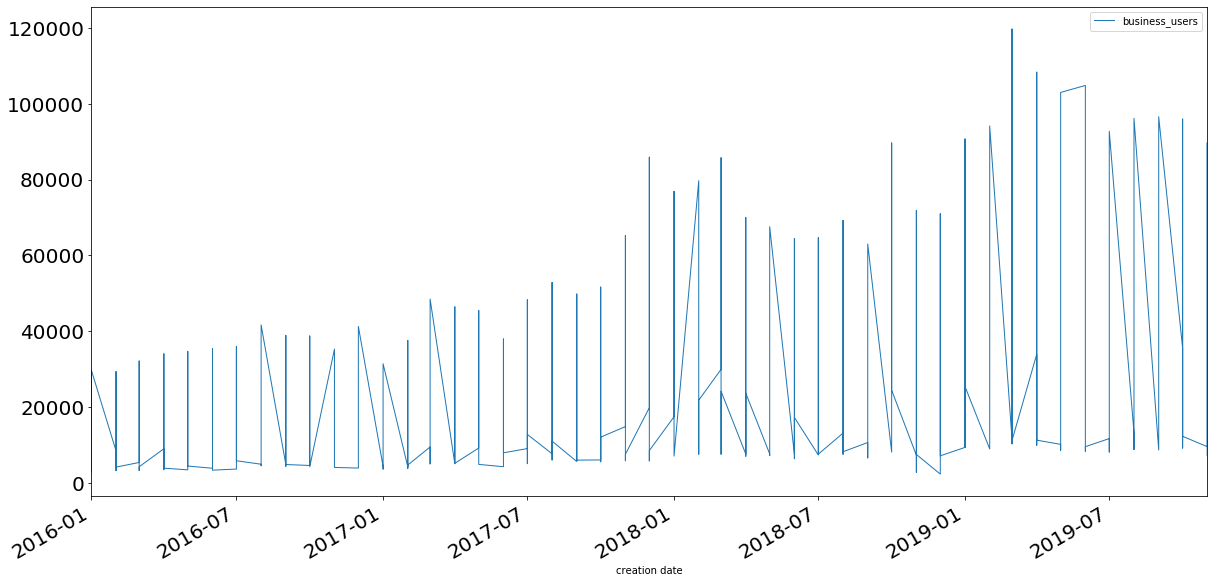

In [46]:
bus_sign_up.plot(figsize=(20,10), linewidth=1, fontsize=20)

In [36]:
bus_sign_up.tail(n=10)

,business_users
creation date,
2017-09-01,6852
2019-11-01,7137
2016-02-01,3304
2017-07-01,5810
2018-03-01,29929
2016-07-01,8940
2018-05-01,67548
2019-10-01,95949
2016-02-01,4765


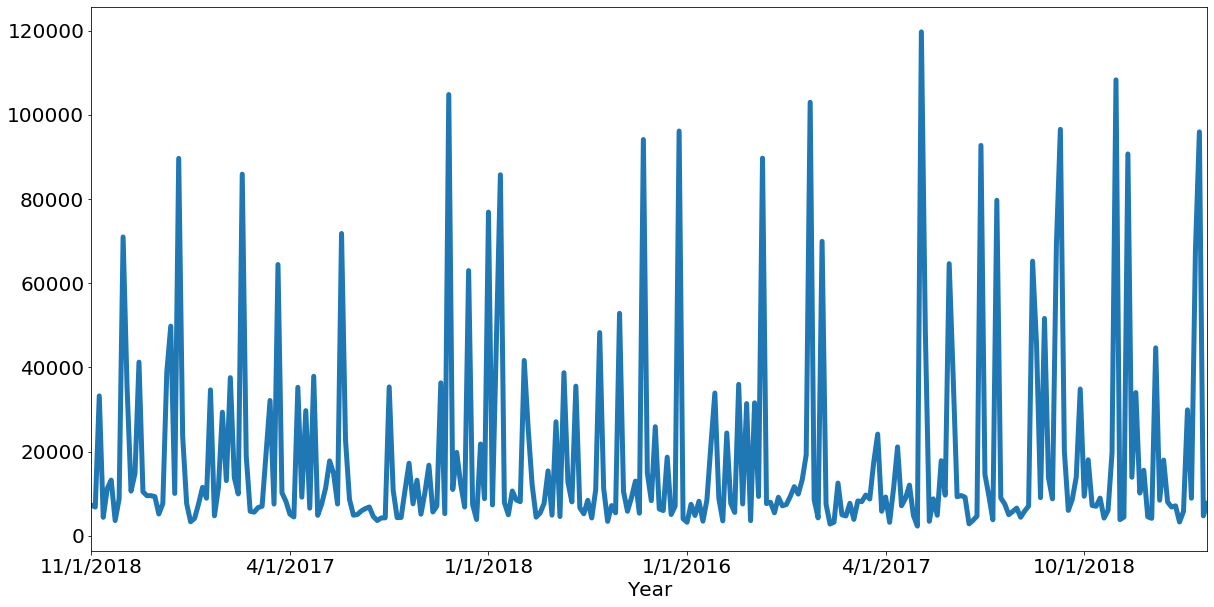

In [16]:
sign_up['business_users'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [26]:
bus = df[['business_users','creation date']]
bus = bus.set_index('creation date', inplace=True)
bus.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

AttributeError: 'NoneType' object has no attribute 'rolling'

In [53]:
b2b_signup = pd.read_excel('C:\\Users\\liujess\\Documents\\Telco\\Vertical\\3-B2B\\business_user_sign_up.xlsx', sheet_name='user_sign_up_month')

In [54]:
b2b_signup.head()

,Month,business_users,ind_users
0,2016-01-01,52288,60141
1,2016-02-01,53272,62521
2,2016-03-01,57295,67471
3,2016-04-01,60348,71319
4,2016-05-01,60918,72825


In [55]:
b2b_signup.Month = pd.to_datetime(b2b_signup['Month'])

In [57]:
b2b_signup.set_index('Month', inplace=True)

In [58]:
b2b_signup.head()

,business_users,ind_users
Month,,
2016-01-01,52288,60141
2016-02-01,53272,62521
2016-03-01,57295,67471
2016-04-01,60348,71319
2016-05-01,60918,72825


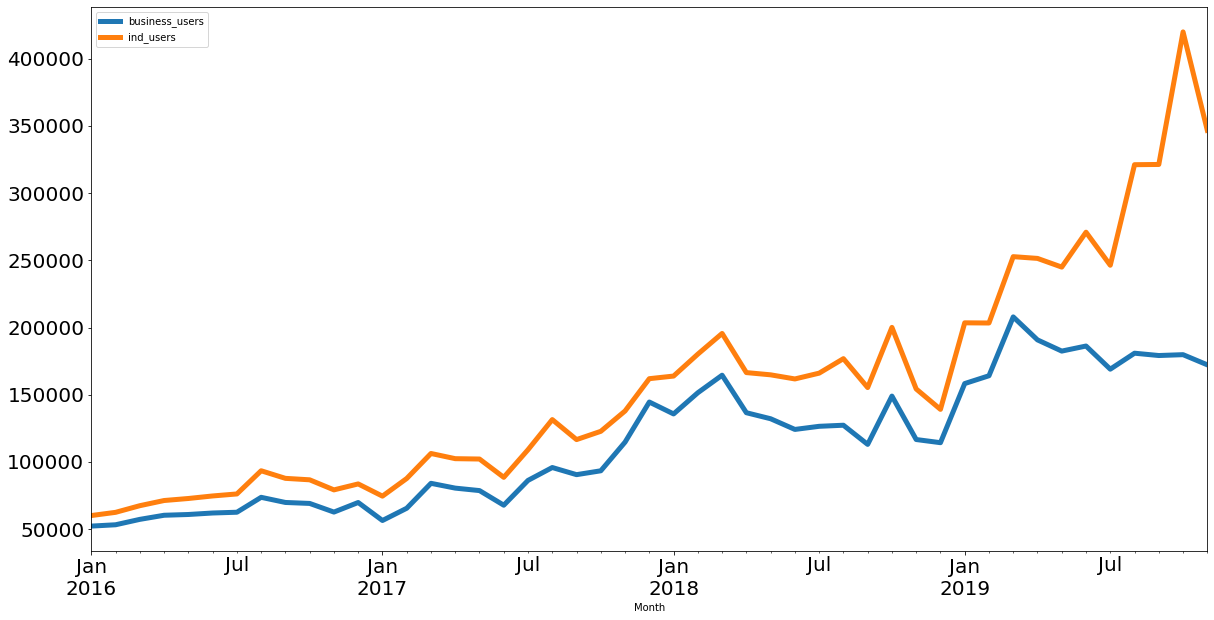

In [61]:
b2b_signup.plot(figsize=(20,10), linewidth=5, fontsize=20)

In [77]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

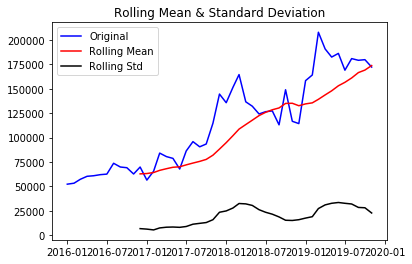

Results of Dickey-Fuller Test:
Test Statistic                  0.003402
p-value                         0.958813
#Lags Used                     10.000000
Number of Observations Used    36.000000
Critical Value (1%)            -3.626652
Critical Value (5%)            -2.945951
Critical Value (10%)           -2.611671
dtype: float64


In [78]:
test_stationarity(b2b_signup['business_users'])

In [80]:
import numpy as np

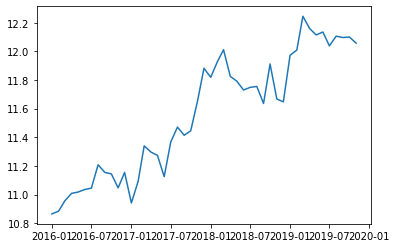

In [82]:
b2b_log = np.log(b2b_signup['business_users'])
plt.plot(b2b_log)

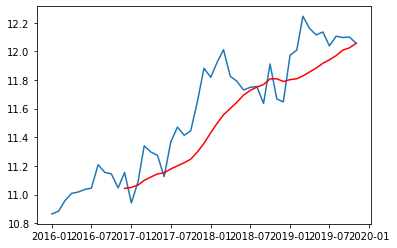

In [83]:
moving_avg = b2b_log.rolling(12).mean()
plt.plot(b2b_log)
plt.plot(moving_avg, color = 'red')

In [85]:
diff = b2b_log - moving_avg
diff.head(12)

Month
2016-01-01         NaN
2016-02-01         NaN
2016-03-01         NaN
2016-04-01         NaN
2016-05-01         NaN
2016-06-01         NaN
2016-07-01         NaN
2016-08-01         NaN
2016-09-01         NaN
2016-10-01         NaN
2016-11-01         NaN
2016-12-01    0.111105
Name: business_users, dtype: float64

In [86]:
diff.dropna(inplace=True)

In [87]:
diff.head()

Month
2016-12-01    0.111105
2017-01-01   -0.108266
2017-02-01    0.024119
2017-03-01    0.241330
2017-04-01    0.173870
Name: business_users, dtype: float64

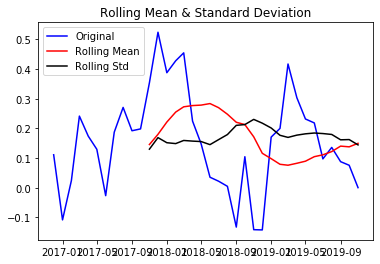

Results of Dickey-Fuller Test:
Test Statistic                 -2.583272
p-value                         0.096504
#Lags Used                      7.000000
Number of Observations Used    28.000000
Critical Value (1%)            -3.688926
Critical Value (5%)            -2.971989
Critical Value (10%)           -2.625296
dtype: float64


In [88]:
test_stationarity(diff)

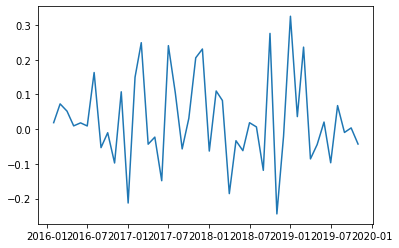

In [90]:
b2b_log_diff = b2b_log - b2b_log.shift()
plt.plot(b2b_log_diff)

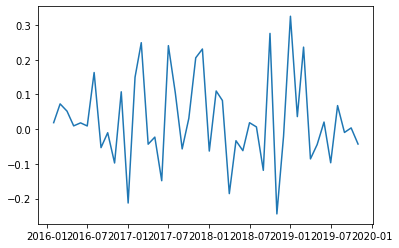

In [91]:
b2b_log_diff.dropna(inplace=True)
plt.plot(b2b_log_diff)

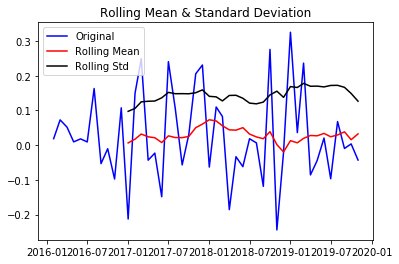

Results of Dickey-Fuller Test:
Test Statistic                -8.122382e+00
p-value                        1.146846e-12
#Lags Used                     0.000000e+00
Number of Observations Used    4.500000e+01
Critical Value (1%)           -3.584829e+00
Critical Value (5%)           -2.928299e+00
Critical Value (10%)          -2.602344e+00
dtype: float64


In [92]:
test_stationarity(b2b_log_diff)

In [ ]:
from 